merging the sheets

In [88]:
import pandas as pd
df=pd.read_excel('Bookshop.xlsx')

In [89]:
file_path = 'Bookshop.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [90]:
book_df = pd.read_excel(file_path, sheet_name='Book')
author_df = pd.read_excel(file_path, sheet_name='Author')
ratings_df = pd.read_excel(file_path, sheet_name='Ratings')
edition_df = pd.read_excel(file_path,sheet_name='Edition')
salesQ1_df = pd.read_excel(file_path,sheet_name='Sales Q1')
salesQ2_df = pd.read_excel(file_path,sheet_name='Sales Q2')
salesQ3_df = pd.read_excel(file_path,sheet_name='Sales Q3')
salesQ4_df = pd.read_excel(file_path,sheet_name='Sales Q4')

In [91]:
print("Book Sheet:")
print(book_df.head())
print("\nAuthor Sheet:")
print(author_df.head())
print("\nRatings Sheet:")
print(ratings_df.head())
print("\nEdition Sheet:")
print(edition_df.head())
print("\nSales Q1 Sheet:")
print(salesQ1_df.head())
print("\nSales Q2 Sheet:")
print(salesQ2_df.head())
print("\nSales Q3 Sheet:")
print(salesQ3_df.head())
print("\nSales Q4 Sheet:")
print(salesQ4_df.head())

Book Sheet:
  BookID                 Title AuthID
0  BB194         Ballinby Boys  AM329
1  NC652    Nothing But Capers  AS443
2  AD222  Alanna Saves the Day  BH149
3  PA169            Post Alley  BM856
4  TC188    Thatchwork Cottage  BM856

Author Sheet:
  AuthID First Name      Last Name   Birthday Country of Residence  \
0  AS443    Abraham     Stackhouse 2147-07-01               Norway   
1  AW980     Amelia  Wangerin, Jr. 2141-03-26          New Zealand   
2  AI923  Anastasia           Inez 2148-03-30          New Zealand   
3  AM329     Arthur        McCrumb 2148-03-13          New Zealand   
4  AH957     Arturo       Hijuelos 2129-01-09       United Kingdom   

   Hrs Writing per Day  
0                  6.0  
1                 16.0  
2                 11.0  
3                  3.0  
4                  8.0  

Ratings Sheet:
  BookID  Rating  ReviewerID  ReviewID
0  AD222       5         105      3372
1  AD222       3         113      7340
2  AD222       3         234     20430
3 

In [92]:
# Reading all sheets into a dictionary of DataFrames
excel_data = pd.read_excel(file_path, sheet_name=None)

# List of sheet names to ignore
ignore_sheets = ['Edition', 'Publisher', 'SalesQ1_df', 'SalesQ2_df', 'SalesQ3_df', 'SalesQ4_df', 'Award']

# Initializing a list to hold the DataFrames to be merged
sheets_to_merge = []

# Loop through each sheet in the Excel file
for sheet_name, sheet_data in excel_data.items():
    # Skiping the sheets we want to ignore
    if sheet_name.lower() in [sheet.lower() for sheet in ignore_sheets]:
        continue

    # Append the sheet data to the sheets_to_merge list
    sheets_to_merge.append(sheet_data)

# If there are no sheets to merge, exit early
if len(sheets_to_merge) == 0:
    print("No valid sheets to merge.")
else:
    # Start with the first DataFrame in the list
    final_data = sheets_to_merge[0]

    # Loop through the rest of the DataFrames and merge them
    for df in sheets_to_merge[1:]:
        # Ensure both DataFrames have the same set of columns before merging
        common_columns = list(final_data.columns.intersection(df.columns))

        if len(common_columns) == 0:
            print(f"No common columns to merge between DataFrames.")
            continue  # Skip this merge if no common columns exist

        # Perform the merge using the common columns
        final_data = pd.merge(final_data, df, how='outer', on=common_columns)

    # Save the final merged DataFrame to a CSV file
    final_data.to_csv('bookshop_combined_outer_join.csv', index=False)

    print("CSV file created: 'bookshop_combined_outer_join.csv'")


No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
No common columns to merge between DataFrames.
CSV file created: 'bookshop_combined_outer_join.csv'


In [93]:
df=pd.read_csv('bookshop_combined_outer_join.csv',low_memory=False)
df

,BookID,Title,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,5.0,225.0,14679.0
1,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,3.0,282.0,19785.0
2,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,4.0,387.0,32661.0
3,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,4.0,421.0,36754.0
4,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,3.0,451.0,41635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599177,CH392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,53168.0,5311454.0
599178,CH392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,53300.0,5325644.0
599179,CH392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,53343.0,5328756.0
599180,CH392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,53418.0,5333880.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599182 entries, 0 to 599181
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BookID                599175 non-null  object 
 1   Title                 592599 non-null  object 
 2   AuthID                592606 non-null  object 
 3   First Name            592606 non-null  object 
 4   Last Name             592606 non-null  object 
 5   Birthday              592606 non-null  object 
 6   Country of Residence  592606 non-null  object 
 7   Hrs Writing per Day   592606 non-null  float64
 8   CheckoutMonth         599173 non-null  float64
 9   Number of Checkouts   599173 non-null  float64
 10  Rating                599173 non-null  float64
 11  ReviewerID            599173 non-null  float64
 12  ReviewID              599173 non-null  float64
dtypes: float64(6), object(7)
memory usage: 59.4+ MB


checking for missing values

In [95]:
df.isnull().sum()

BookID                     7
Title                   6583
AuthID                  6576
First Name              6576
Last Name               6576
Birthday                6576
Country of Residence    6576
Hrs Writing per Day     6576
CheckoutMonth              9
Number of Checkouts        9
Rating                     9
ReviewerID                 9
ReviewID                   9
dtype: int64

In [96]:
import pandas as pd
# Replace missing values in numeric columns with median or mean as appropriate
numeric_columns = ['CheckoutMonth', 'Number of Checkouts', 'Rating', 'ReviewerID', 'ReviewID', 'Hrs Writing per Day']

# Use median for numeric columns (you can change to mean if preferred)
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Replace missing values in categorical columns with mode (most frequent value)
categorical_columns = ['Title', 'AuthID', 'First Name', 'Last Name', 'Birthday', 'Country of Residence', 'BookID']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with the most frequent value

# Check the result
print(df.isnull().sum())  # This will show if there are any remaining missing values


BookID                  0
Title                   0
AuthID                  0
First Name              0
Last Name               0
Birthday                0
Country of Residence    0
Hrs Writing per Day     0
CheckoutMonth           0
Number of Checkouts     0
Rating                  0
ReviewerID              0
ReviewID                0
dtype: int64


In [97]:
df.describe()

,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
count,599182.000000,599182.000000,599182.000000,599182.000000,599182.000000,5.991820e+05
mean,6.638945,6.497406,28.303207,4.119303,26846.496225,2.678723e+06
std,2.277793,3.447469,29.221805,0.931067,15314.806833,1.531473e+06
min,0.000000,1.000000,2.000000,1.000000,3.000000,-8.289000e+03
25%,5.000000,4.000000,9.000000,4.000000,13705.000000,1.364738e+06
50%,7.000000,7.000000,17.000000,4.000000,26777.000000,2.671756e+06
75%,8.000000,9.000000,36.000000,5.000000,39971.000000,3.991298e+06
max,16.000000,12.000000,130.000000,5.000000,53424.000000,5.338737e+06


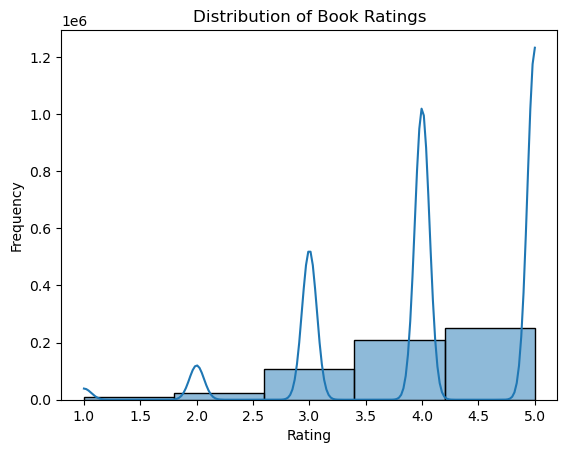

In [98]:
#plt.figure(figsize=(8, 6))
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

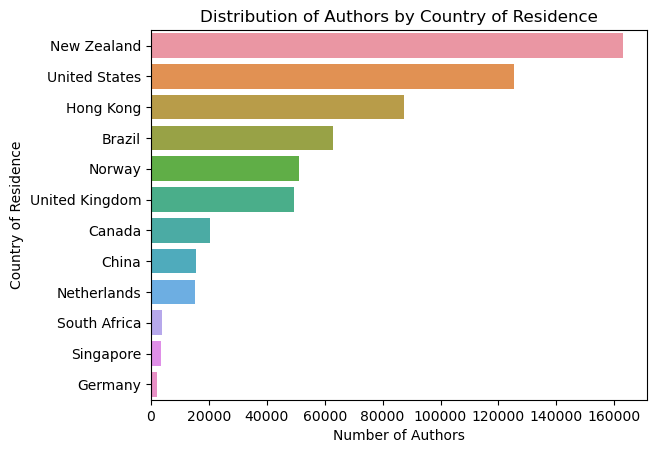

In [99]:
sns.countplot(y=df['Country of Residence'],
              order=df['Country of Residence'].value_counts().index)
plt.title('Distribution of Authors by Country of Residence')
plt.xlabel('Number of Authors')
plt.ylabel('Country of Residence')
plt.show()

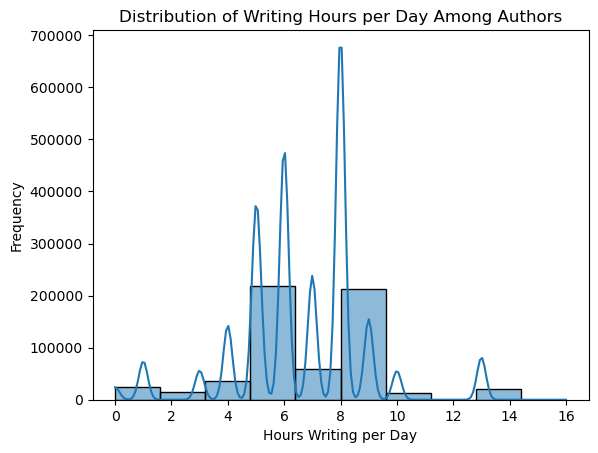

In [100]:
sns.histplot(df['Hrs Writing per Day'], bins=10, kde=True)
plt.title('Distribution of Writing Hours per Day Among Authors')
plt.xlabel('Hours Writing per Day')
plt.ylabel('Frequency')
plt.show()

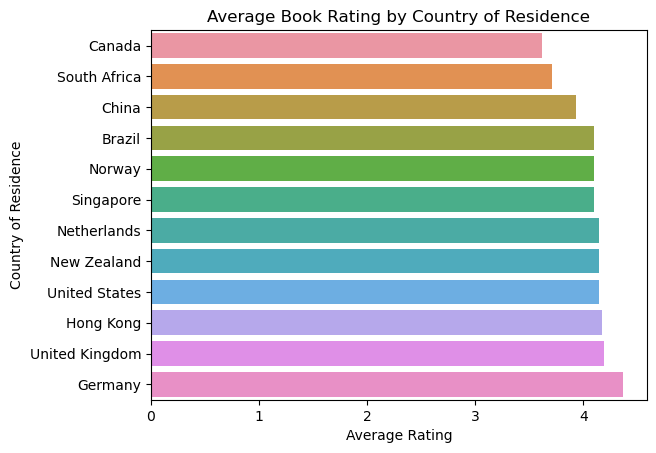

In [101]:
avg_rating_by_country = df.groupby('Country of Residence')['Rating'].mean().sort_values()
sns.barplot(x=avg_rating_by_country, y=avg_rating_by_country.index)
plt.title('Average Book Rating by Country of Residence')
plt.xlabel('Average Rating')
plt.ylabel('Country of Residence')
plt.show()

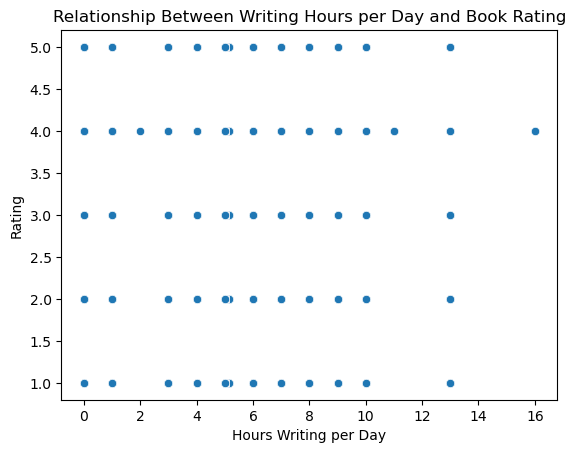

In [102]:
sns.scatterplot(x='Hrs Writing per Day', y='Rating', data=df)
plt.title('Relationship Between Writing Hours per Day and Book Rating')
plt.xlabel('Hours Writing per Day')
plt.ylabel('Rating')
plt.show()

Calculate total sales for each book

In [103]:
df

,BookID,Title,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,5.0,225.0,14679.0
1,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,3.0,282.0,19785.0
2,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,4.0,387.0,32661.0
3,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,4.0,421.0,36754.0
4,BB194,Ballinby Boys,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.0,3.0,33.0,3.0,451.0,41635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599177,CH392,The Mallemaroking,LD375,Lynne,Danticat,2155-08-19,New Zealand,7.0,4.0,5.0,5.0,53168.0,5311454.0
599178,CH392,The Mallemaroking,LD375,Lynne,Danticat,2155-08-19,New Zealand,7.0,4.0,5.0,4.0,53300.0,5325644.0
599179,CH392,The Mallemaroking,LD375,Lynne,Danticat,2155-08-19,New Zealand,7.0,4.0,5.0,4.0,53343.0,5328756.0
599180,CH392,The Mallemaroking,LD375,Lynne,Danticat,2155-08-19,New Zealand,7.0,4.0,5.0,5.0,53418.0,5333880.0


In [104]:
df.shape

(599182, 13)

In [105]:
sales_df=pd.concat([salesQ1_df,salesQ2_df,salesQ3_df,salesQ4_df])

In [106]:
sales_df

,Sale Date,ISBN,Discount,ItemID,OrderID
0,2193-01-02,989-28-3705-007-2,NaN,107020-91-8011,107020-1
1,2193-01-02,989-28-79-11297-4,NaN,107020-9-3293,107020-10
2,2193-01-02,989-28-79-11297-4,NaN,107020-91-4622,107020-11
3,2193-01-02,989-28-79-18127-7,NaN,107020-38-4663,107020-12
4,2193-01-02,989-28-79-82197-5,0.15,107020-1-1485,107020-13
...,...,...,...,...,...
13088,2193-12-31,989-28-229-5891-8,NaN,107383-57-1559,107383-49786
13089,2193-12-31,989-28-3705-222-9,NaN,107383-73-7579,107383-49786
13090,2193-12-31,989-28-3705-007-2,NaN,107383-54-3838,107383-49787
13091,2193-12-31,989-28-229-9769-6,NaN,107383-75-7720,107383-49787


In [107]:
edition_df

,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),Price
0,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99
1,989-28-654-6930-3,NP937,Hardcover,PP,2178-08-18,394,6,30.99
2,989-28-79-52883-6,PA169,Hardcover,PP,2178-09-08,384,10,27.99
3,989-28-79-43574-5,TM925,Graphic,ESP,2178-09-15,187,8,23.99
4,989-28-654-5794-2,HS107,Hardcover,PP,2178-09-29,640,3,26.99
...,...,...,...,...,...,...,...,...
90,989-28-654-6507-7,SS693,Trade paperback,PP,2192-05-15,387,8,15.99
91,989-28-79-03683-6,TA182,Hardcover,ESP,2192-07-03,340,35,18.50
92,989-28-654-3899-6,WK456,Hardcover,PP,2192-08-14,207,2,29.99
93,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,13.46


In [108]:
book_data=pd.merge(edition_df ,df ,on='BookID')

In [109]:
book_data

,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),Price,Title,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,3.0,19.0,-3554.0
1,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,5.0,52.0,-1365.0
2,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,3.0,174.0,13638.0
3,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,5.0,178.0,9385.0
4,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99,Turn Left Til You Get There,KE397,Kris,Elegant,2149-08-26,Hong Kong,5.0,7.0,9.0,3.0,263.0,21251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012412,989-28-654-3899-6,WK456,Hardcover,PP,2192-08-14,207,2,29.99,Who Did You Think You Were Kidding?,PA878,Philip,Antrim,2148-04-22,Netherlands,7.0,10.0,5.0,4.0,52905.0,5287530.0
1012413,989-28-654-3899-6,WK456,Hardcover,PP,2192-08-14,207,2,29.99,Who Did You Think You Were Kidding?,PA878,Philip,Antrim,2148-04-22,Netherlands,7.0,10.0,5.0,5.0,52956.0,5292036.0
1012414,989-28-654-3899-6,WK456,Hardcover,PP,2192-08-14,207,2,29.99,Who Did You Think You Were Kidding?,PA878,Philip,Antrim,2148-04-22,Netherlands,7.0,10.0,5.0,4.0,53013.0,5297241.0
1012415,989-28-654-3899-6,WK456,Hardcover,PP,2192-08-14,207,2,29.99,Who Did You Think You Were Kidding?,PA878,Philip,Antrim,2148-04-22,Netherlands,7.0,10.0,5.0,1.0,53144.0,5305688.0


In [110]:
#edition_sales_df['Total Sales'] = edition_sales_df['Price'] * (1 - edition_sales_df['Discount'])
#edition_sales_df['Total Sales'].fillna(edition_sales_df['Price'], inplace=True)

In [111]:
#book_sales = edition_sales_df.groupby('BookID')['Total Sales'].sum().reset_index()
#book_sales

In [112]:
num_ratings_df=book_data.groupby('Title').count()['Rating'].reset_index()
num_ratings_df.rename(columns={'Rating':'num_rating'},inplace=True)
num_ratings_df

,Title,num_rating
0,(im)Mortality,5880
1,9803 North Millworks Road,19128
2,A Horrible Human with the Habits of a Monster,3660
3,Adventures of Kaya,18204
4,Alanna Saves the Day,11328
5,And I Said Yes,23280
6,Ballinby Boys,10308
7,Banana Slug and Xyr Friends,25992
8,Banana Slug and the Glass Half Full,26712
9,Banana Slug and the Lost Cow,24360


In [113]:
avg_ratings_df=book_data.groupby('Title').mean(numeric_only=True)['Rating'].reset_index()
avg_ratings_df.rename(columns={'Rating':'AVG_rating'},inplace=True)
avg_ratings_df

,Title,AVG_rating
0,(im)Mortality,4.077551
1,9803 North Millworks Road,4.089084
2,A Horrible Human with the Habits of a Monster,3.714754
3,Adventures of Kaya,4.421885
4,Alanna Saves the Day,4.018008
5,And I Said Yes,3.860825
6,Ballinby Boys,3.740396
7,Banana Slug and Xyr Friends,4.094183
8,Banana Slug and the Glass Half Full,4.338724
9,Banana Slug and the Lost Cow,4.005911


In [114]:
popular_df=num_ratings_df.merge(avg_ratings_df,on='Title')
popular_df

,Title,num_rating,AVG_rating
0,(im)Mortality,5880,4.077551
1,9803 North Millworks Road,19128,4.089084
2,A Horrible Human with the Habits of a Monster,3660,3.714754
3,Adventures of Kaya,18204,4.421885
4,Alanna Saves the Day,11328,4.018008
5,And I Said Yes,23280,3.860825
6,Ballinby Boys,10308,3.740396
7,Banana Slug and Xyr Friends,25992,4.094183
8,Banana Slug and the Glass Half Full,26712,4.338724
9,Banana Slug and the Lost Cow,24360,4.005911


In [115]:
popular_df[popular_df['num_rating']>=1000]

,Title,num_rating,AVG_rating
0,(im)Mortality,5880,4.077551
1,9803 North Millworks Road,19128,4.089084
2,A Horrible Human with the Habits of a Monster,3660,3.714754
3,Adventures of Kaya,18204,4.421885
4,Alanna Saves the Day,11328,4.018008
5,And I Said Yes,23280,3.860825
6,Ballinby Boys,10308,3.740396
7,Banana Slug and Xyr Friends,25992,4.094183
8,Banana Slug and the Glass Half Full,26712,4.338724
9,Banana Slug and the Lost Cow,24360,4.005911


In [116]:
book_data_df=popular_df.merge(book_data,on='Title')

In [117]:
book_data_df

,Title,num_rating,AVG_rating,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),...,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,113.0,8132.0
1,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,5.0,500.0,42080.0
2,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,5.0,557.0,51839.0
3,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,859.0,79960.0
4,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,3.0,1245.0,120441.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012412,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,2.0,53277.0,5320077.0
1012413,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,5.0,53316.0,5324472.0
1012414,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,1.0,53340.0,5327961.0
1012415,the life and times of an utterly inconsequenti...,32856,3.195033,989-28-79-11297-4,TP887,Trade paperback,ESP,2192-08-25,1296,30,...,David,Beam,2157-02-26,United States,5.13,12.0,13.0,5.0,53396.0,5330789.0


In [118]:
book_data_df.shape

(1012417, 22)

In [119]:
book_data_df=book_data_df.drop_duplicates('Title')

In [120]:
book_data_df

,Title,num_rating,AVG_rating,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),...,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID
0,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Clifford,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,113.0,8132.0
5880,9803 North Millworks Road,19128,4.089084,989-28-79-82749-6,NR695,Hardcover,ESP,2181-07-10,384,5,...,Carolyn,Segal,2133-09-24,United States,7.00,3.0,49.0,4.0,8.0,-7179.0
25008,A Horrible Human with the Habits of a Monster,3660,3.714754,989-28-79-16826-1,AM124,Graphic,ESP,2189-03-24,85,3,...,Kenneth,Douglas,2163-09-24,South Africa,3.00,7.0,9.0,4.0,148.0,8167.0
28668,Adventures of Kaya,18204,4.421885,989-28-3705-222-9,AK974,Trade paperback,CHP,2182-07-23,256,35,...,Ward,Haigh,2153-10-07,Brazil,7.00,8.0,64.0,5.0,315.0,25164.0
46872,Alanna Saves the Day,11328,4.018008,989-28-3705-987-7,AD222,Trade paperback,CHP,2185-09-22,188,10,...,Bernard,Hopf,2122-11-27,United States,1.00,1.0,40.0,5.0,105.0,3372.0
58200,And I Said Yes,23280,3.860825,989-28-79-18127-7,AY135,Hardcover,ESP,2179-04-24,704,15,...,Elmer,Komroff,2129-07-11,Norway,6.00,8.0,10.0,4.0,79.0,79.0
81480,Ballinby Boys,10308,3.740396,989-28-79-68089-3,BB194,Hardcover,ESP,2179-05-18,401,10,...,Arthur,McCrumb,2148-03-13,New Zealand,3.00,3.0,33.0,5.0,225.0,14679.0
91788,Banana Slug and Xyr Friends,25992,4.094183,989-28-3705-138-3,BF374,Board book,CHP,2188-05-27,12,18,...,Hillary,Barnhardt,2154-03-07,New Zealand,4.00,9.0,28.0,4.0,28.0,-4068.0
117780,Banana Slug and the Glass Half Full,26712,4.338724,989-28-3705-592-3,BF889,Board book,CHP,2186-10-10,12,8,...,Gloria,Green,2156-09-19,Hong Kong,8.00,7.0,16.0,5.0,105.0,5946.0
144492,Banana Slug and the Lost Cow,24360,4.005911,989-28-3705-583-1,BC244,Board book,CHP,2187-05-08,13,10,...,Hillary,Barnhardt,2154-03-07,New Zealand,4.00,1.0,21.0,4.0,12.0,-3951.0


In [121]:
book_data_df.shape

(57, 22)

Collaborative filtering based on recommendation system

In [122]:
book_data_df.groupby('AuthID').count()['Rating']

AuthID
AM329    1
AS443    1
BH149    1
BM856    3
BT132    3
CF829    2
CS190    2
CW626    1
DB605    1
EH487    1
EK605    3
GG800    3
GH671    1
HB302    2
JH502    2
JK592    1
JS525    2
KD840    1
KE397    1
KY296    2
LD375    8
LK915    1
LL585    1
LN356    1
MW974    2
OL640    1
PA878    1
PB147    1
PH273    1
RL217    1
RP438    2
UK129    2
WH901    1
Name: Rating, dtype: int64

In [123]:
book_data_df.isnull().sum()

Title                   0
num_rating              0
AVG_rating              0
ISBN                    0
BookID                  0
Format                  0
PubID                   0
Publication Date        0
Pages                   0
Print Run Size (k)      0
Price                   0
AuthID                  0
First Name              0
Last Name               0
Birthday                0
Country of Residence    0
Hrs Writing per Day     0
CheckoutMonth           0
Number of Checkouts     0
Rating                  0
ReviewerID              0
ReviewID                0
dtype: int64

In [124]:
book_pivot=book_data_df.pivot_table(columns='ReviewerID',index='Title',values='Rating')

In [125]:
book_pivot

ReviewerID,3.0,4.0,7.0,8.0,11.0,12.0,14.0,15.0,17.0,19.0,...,281.0,283.0,315.0,338.0,341.0,623.0,696.0,750.0,1342.0,26777.0
Title,,,,,,,,,,,,,,,,,,,,,
(im)Mortality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9803 North Millworks Road,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Horrible Human with the Habits of a Monster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adventures of Kaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alanna Saves the Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
And I Said Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ballinby Boys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Slug and Xyr Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Slug and the Glass Half Full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
book_pivot.fillna(0,inplace=True)

In [127]:
book_pivot

ReviewerID,3.0,4.0,7.0,8.0,11.0,12.0,14.0,15.0,17.0,19.0,...,281.0,283.0,315.0,338.0,341.0,623.0,696.0,750.0,1342.0,26777.0
Title,,,,,,,,,,,,,,,,,,,,,
(im)Mortality,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9803 North Millworks Road,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Horrible Human with the Habits of a Monster,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adventures of Kaya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alanna Saves the Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
And I Said Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ballinby Boys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banana Slug and Xyr Friends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Banana Slug and the Glass Half Full,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
book_data_df['TransactionID'] = book_data_df['ReviewerID'].astype(str) + '_' + book_data_df['CheckoutMonth'].astype(str)

C:\Users\91805\AppData\Local\Temp\ipykernel_3272\3670236635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data_df['TransactionID'] = book_data_df['ReviewerID'].astype(str) + '_' + book_data_df['CheckoutMonth'].astype(str)


In [129]:
transactions = book_data_df.groupby('TransactionID')['Title'].apply(list)

In [130]:
transactions

TransactionID
105.0_1.0        [Alanna Saves the Day, The Spark and The Ashes]
105.0_7.0                  [Banana Slug and the Glass Half Full]
11.0_9.0                               [It's Never Just a Glass]
113.0_8.0                                        [(im)Mortality]
115.0_7.0                                    [No More Lightning]
12.0_1.0                          [Banana Slug and the Lost Cow]
121.0_10.0          [We're Sisters and We Kinda Like Each Other]
124.0_7.0                                   [Thatchwork Cottage]
1342.0_3.0                                    [Can I Be Honest?]
138.0_11.0                                  [The Elephant House]
14.0_6.0                   [Who Did You Think You Were Kidding?]
14.0_8.0                                          [The Thing Is]
14.0_9.0                                  [Tales of the Compass]
148.0_7.0        [A Horrible Human with the Habits of a Monster]
15.0_1.0       [the life and times of an utterly inconsequent...
17.0_10.0  

In [131]:
book_data_df

,Title,num_rating,AVG_rating,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),...,Last Name,Birthday,Country of Residence,Hrs Writing per Day,CheckoutMonth,Number of Checkouts,Rating,ReviewerID,ReviewID,TransactionID
0,(im)Mortality,5880,4.077551,989-28-3705-763-7,MM424,Hardcover,CHP,2191-11-15,324,3,...,Wolitzer,2143-08-01,United Kingdom,8.00,8.0,5.0,4.0,113.0,8132.0,113.0_8.0
5880,9803 North Millworks Road,19128,4.089084,989-28-79-82749-6,NR695,Hardcover,ESP,2181-07-10,384,5,...,Segal,2133-09-24,United States,7.00,3.0,49.0,4.0,8.0,-7179.0,8.0_3.0
25008,A Horrible Human with the Habits of a Monster,3660,3.714754,989-28-79-16826-1,AM124,Graphic,ESP,2189-03-24,85,3,...,Douglas,2163-09-24,South Africa,3.00,7.0,9.0,4.0,148.0,8167.0,148.0_7.0
28668,Adventures of Kaya,18204,4.421885,989-28-3705-222-9,AK974,Trade paperback,CHP,2182-07-23,256,35,...,Haigh,2153-10-07,Brazil,7.00,8.0,64.0,5.0,315.0,25164.0,315.0_8.0
46872,Alanna Saves the Day,11328,4.018008,989-28-3705-987-7,AD222,Trade paperback,CHP,2185-09-22,188,10,...,Hopf,2122-11-27,United States,1.00,1.0,40.0,5.0,105.0,3372.0,105.0_1.0
58200,And I Said Yes,23280,3.860825,989-28-79-18127-7,AY135,Hardcover,ESP,2179-04-24,704,15,...,Komroff,2129-07-11,Norway,6.00,8.0,10.0,4.0,79.0,79.0,79.0_8.0
81480,Ballinby Boys,10308,3.740396,989-28-79-68089-3,BB194,Hardcover,ESP,2179-05-18,401,10,...,McCrumb,2148-03-13,New Zealand,3.00,3.0,33.0,5.0,225.0,14679.0,225.0_3.0
91788,Banana Slug and Xyr Friends,25992,4.094183,989-28-3705-138-3,BF374,Board book,CHP,2188-05-27,12,18,...,Barnhardt,2154-03-07,New Zealand,4.00,9.0,28.0,4.0,28.0,-4068.0,28.0_9.0
117780,Banana Slug and the Glass Half Full,26712,4.338724,989-28-3705-592-3,BF889,Board book,CHP,2186-10-10,12,8,...,Green,2156-09-19,Hong Kong,8.00,7.0,16.0,5.0,105.0,5946.0,105.0_7.0
144492,Banana Slug and the Lost Cow,24360,4.005911,989-28-3705-583-1,BC244,Board book,CHP,2187-05-08,13,10,...,Barnhardt,2154-03-07,New Zealand,4.00,1.0,21.0,4.0,12.0,-3951.0,12.0_1.0


Association Rules Model

In [132]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [133]:
# Convert transactions into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

In [134]:
basket = book_data_df.groupby(['ReviewerID', 'BookID'])['Rating'].sum().unstack().reset_index().fillna(0).set_index('ReviewerID')

In [135]:
def encode_units(x):
    return 1 if x >= 1 else 0

In [136]:
basket = basket.applymap(encode_units)

In [137]:
basket

BookID,AD222,AK974,AM124,AY135,BB194,BC244,BF374,BF889,BR858,BS284,...,TM925,TO369,TP887,TS869,TT359,TT773,WG715,WK456,WO506,ZT703
ReviewerID,,,,,,,,,,,,,,,,,,,,,
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

C:\Users\91805\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [139]:
from mlxtend.frequent_patterns import association_rules


if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering min_support further or check your data.")
else:
    # Continue with association rule generation
    # The 'support_only=False' argument ensures that association_rules considers itemset lengths other than 1.
    # Assuming you want to generate rules for all frequent itemsets:
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.02, support_only=False, num_itemsets=frequent_itemsets.shape[0])


In [140]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(AD222),(BF889),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
1,(BF889),(AD222),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
2,(AD222),(TA182),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
3,(TA182),(AD222),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
4,(BS284),(BF374),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
5,(BF374),(BS284),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
6,(BF889),(TA182),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
7,(TA182),(BF889),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
8,(IA439),(HP265),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0
9,(HP265),(IA439),0.021739,0.021739,0.021739,1.0,46.0,1.0,0.021267,inf,1.0,1.0,1.0,1.0


KMEANS CLUSTERING

In [141]:
features = ['num_rating', 'AVG_rating', 'Pages', 'Print Run Size (k)', 'Hrs Writing per Day', 'Number of Checkouts', 'Rating']  # Changed to a list
X = book_data_df[features].fillna(0) # Changed df to book_data_df, as features likely belong to book_data_df

In [142]:
from sklearn.cluster import KMeans

In [143]:
kmeans = KMeans(n_clusters=5, random_state=42)  # You can change the number of clusters
book_data_df['Cluster'] = kmeans.fit_predict(X)

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91805\AppData\Local\Temp\ipykernel_3272\3306450936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data_df['Cluster'] = kmeans.fit_predict(X)


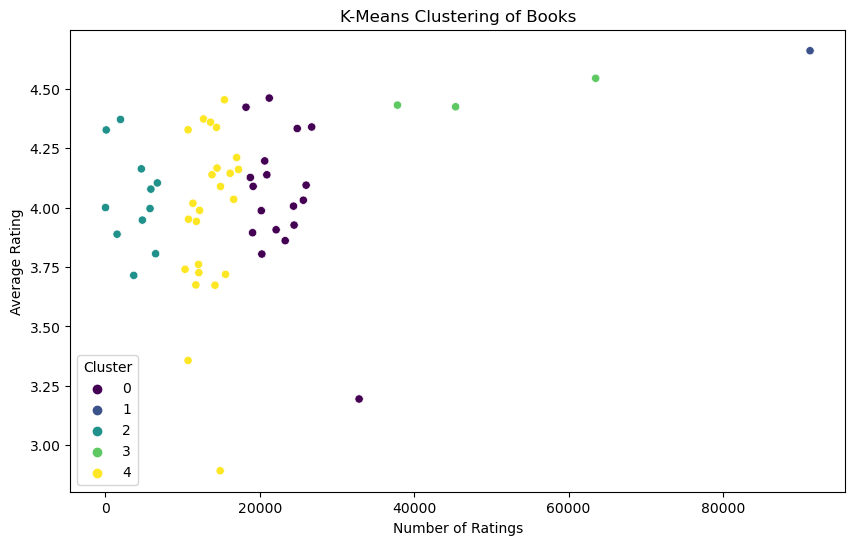

In [144]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_rating', y='AVG_rating', hue='Cluster', data=book_data_df, palette='viridis')
plt.title('K-Means Clustering of Books')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.legend(title='Cluster')
plt.show()

In [145]:
from sklearn.metrics import silhouette_score

In [146]:
optimal_clusters = 5
silhouette_avg=silhouette_score(X,book_data_df['Cluster'])
print(f'silhouette Score for {optimal_clusters} clusters : {silhouette_avg}')

silhouette Score for 5 clusters : 0.5730598501766111


In [147]:
from sklearn.metrics import davies_bouldin_score

# Evaluate the clustering model
# Calculate the Silhouette Score
silhouette_avg = silhouette_score(X, book_data_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5730598501766111


In [148]:
# Calculate the Davies-Bouldin Index
davies_bouldin_avg = davies_bouldin_score(X, book_data_df['Cluster'])
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')



Davies-Bouldin Index: 0.4365089335267278


In [149]:
# Calculate the Inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 755072586.7409673


In [150]:
from scipy.sparse import csr_matrix

In [151]:
book_sparse=csr_matrix(book_pivot)

In [152]:
book_sparse

<57x46 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [153]:
from sklearn.neighbors import NearestNeighbors

In [154]:
model=NearestNeighbors(algorithm='brute')

In [155]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [156]:
# Check the shape of your book_pivot DataFrame to see the number of rows and columns
print(book_pivot.shape)

# Assuming you want the last row, change 237 to the correct index based on the shape
row_index = book_pivot.shape[0] - 1  # This will get the last row's index

# Now use the correct row_index:
distance, suggestion = model.kneighbors(book_pivot.iloc[row_index,:].values.reshape(1,-1),n_neighbors=6)

(57, 46)


In [157]:
distance

array([[0.        , 5.09901951, 5.09901951, 5.38516481, 5.38516481,
        5.38516481]])

In [158]:
suggestion

array([[56, 22, 14, 18, 27, 15]], dtype=int64)

In [159]:
for i in range(len(suggestion)):
  print(book_pivot.index[suggestion[i]])

Index(['the life and times of an utterly inconsequential person',
       'It's Never Just a Glass', 'Concerning Prophecy',
       'Hashtag QuokkaSelfie', 'Natural Pamplemousse', 'Did You Hear?'],
      dtype='object', name='Title')


In [160]:
book_pivot.index[3]

'Adventures of Kaya'

In [161]:
book_name=book_pivot.index

In [162]:
book_name

Index(['(im)Mortality', '9803 North Millworks Road',
       'A Horrible Human with the Habits of a Monster', 'Adventures of Kaya',
       'Alanna Saves the Day', 'And I Said Yes', 'Ballinby Boys',
       'Banana Slug and Xyr Friends', 'Banana Slug and the Glass Half Full',
       'Banana Slug and the Lost Cow', 'Banana Slug and the Mossy Rock',
       'Burnished Silver', 'Can I Be Honest?', 'Cimornul',
       'Concerning Prophecy', 'Did You Hear?', 'Don't Check your Ego',
       'Dust on the Rim', 'Hashtag QuokkaSelfie', 'Heliotrope Pajamas',
       'Inconvenient Confessions: a memoir', 'Interrobangs for All',
       'It's Never Just a Glass', 'Kalakalal Avenue', 'Lace and Brandy',
       'Land Water Sky Space', 'Muddy Waters', 'Natural Pamplemousse',
       'No More Lightning', 'Not to Gossip, But', 'Nothing But Capers',
       'Portmeirion', 'Post Alley', 'Quiddity and Quoddity', 'Rystwyth',
       'Saint Esme', 'Say it with Snap!', 'She Also Tottered',
       'Soft, Pliable Truth', 

In [163]:
import pickle
import os

os.makedirs('artifacts', exist_ok=True)

# Now you can proceed with saving the objects:
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_name, open('artifacts/book_name.pkl', 'wb'))
pickle.dump(book_data_df, open('artifacts/book_data_df.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))


In [164]:
import numpy as np
def recommend_book(book_name):
  book_id=np.where(book_pivot.index == book_name)[0][0]
  distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)

  for i in range(len(suggestion)):
    books = book_pivot.index[suggestion[i]]
    for j in books:
      print(j)

In [165]:
book_name='Ballinby Boys'
recommend_book(book_name)

Ballinby Boys
Concerning Prophecy
It's Never Just a Glass
Natural Pamplemousse
Did You Hear?
Hashtag QuokkaSelfie


In [166]:
np.where(book_pivot.index == 'Ballinby Boys')[0][0]

6

In [84]:
import pandas as pd
print(pd.__version__)


2.0.3
